Brent Data set Cleaning

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Read the Excel file
df = pd.read_excel("Brent.xlsx")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Select only the numerical columns for imputation
numeric_cols = df.select_dtypes(include=['number'])

# Perform KNN imputation on numerical columns
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputed_numeric_data = imputer.fit_transform(numeric_cols)

# Convert the imputed data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols.columns, index=df.index)

# Merge imputed numerical columns with non-numeric columns
df_imputed = pd.concat([df.drop(columns=numeric_cols.columns), df_imputed_numeric], axis=1)

# Save the cleaned and imputed data to a new Excel file
new_directory = "C:\\Users\\deept\\Desktop\\"
file_name = "Brent1_imputed.xlsx"
file_path = new_directory + file_name

df_imputed.to_excel(file_path, index=False)

print("Imputed data saved to:", file_path)


print("Imputed data saved to:", file_path)


Missing Values:
 code                   1
name                   2
date                   2
Opening Price (RMB)    2
Highest Price (RMB)    2
Lowest Price (RMB)     2
Closing Price (RMB)    2
Settlement price       2
Volume                 2
Open interest          2
dtype: int64
Imputed data saved to: C:\Users\deept\Desktop\Brent1_imputed.xlsx
Imputed data saved to: C:\Users\deept\Desktop\Brent1_imputed.xlsx


feature selection code for Brent

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the Brent dataset using a raw string literal for the file path
df = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')

# Convert all non-numeric columns to categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Ensure the target variable is numeric
y = df['Closing Price (RMB)'].astype(float)

# Separate features (X)
X = df.drop(columns=['Closing Price (RMB)'])

# Convert datetime columns to numeric representation
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to seconds since epoch

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Perform feature selection
k = 5  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X_encoded.columns[selected_indices]
print("Selected features:")
print(selected_features)


Selected features:
Index(['date', 'Opening Price (RMB)', 'Highest Price (RMB)',
       'Lowest Price (RMB)', 'Settlement price'],
      dtype='object')


brent data splits into train and test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')
# Assuming 'df' is your DataFrame conta ining the cleaned dataset

# Specify features (X) and target variable (y)
# For example, let's assume 'Opening Price (RMB)' is a feature and 'Closing Price (RMB)' is the target variable
X = df[['Opening Price (RMB)']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (6150, 1) Target: (6150,)
Testing set - Features: (1538, 1) Target: (1538,)


Gold data set cleaning

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Read the Excel file
df = pd.read_excel("Gold.xlsx")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Select only the numerical columns for imputation
numeric_cols = df.select_dtypes(include=['number'])

# Perform KNN imputation on numerical columns
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputed_numeric_data = imputer.fit_transform(numeric_cols)

# Convert the imputed data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols.columns, index=df.index)

# Merge imputed numerical columns with non-numeric columns
df_imputed = pd.concat([df.drop(columns=numeric_cols.columns), df_imputed_numeric], axis=1)

# Save the cleaned and imputed data to a new Excel file
new_directory = "C:\\Users\\deept\\Desktop\\"
file_name = "Gold1_imputed.xlsx"
file_path = new_directory + file_name

df_imputed.to_excel(file_path, index=False)

print("Imputed data saved to:", file_path)


print("Imputed data saved to:", file_path)


Missing Values:
 code                    1
name                    2
date                    2
Opening Price (RMB)     2
Highest Price (RMB)     2
 Lowest Price (RMB)     2
Closing Price (RMB)     2
Settlement Price        2
Volume                  2
Open Interest           2
dtype: int64
Imputed data saved to: C:\Users\deept\Desktop\Gold1_imputed.xlsx
Imputed data saved to: C:\Users\deept\Desktop\Gold1_imputed.xlsx


Feature selection code for Gold

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the Brent dataset using a raw string literal for the file path
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Convert all non-numeric columns to categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Ensure the target variable is numeric
y = df['Closing Price (RMB)'].astype(float)

# Separate features (X)
X = df.drop(columns=['Closing Price (RMB)'])

# Convert datetime columns to numeric representation
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to seconds since epoch

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Perform feature selection
k = 5  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X_encoded.columns[selected_indices]
print("Selected features:")
print(selected_features)


Selected features:
Index(['date', 'Opening Price (RMB) ', 'Highest Price (RMB)',
       ' Lowest Price (RMB)', 'Settlement Price'],
      dtype='object')


Gold dataset split into train and test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')
# Assuming 'df' is your DataFrame conta ining the cleaned dataset

# Specify features (X) and target variable (y)
# For example, let's assume 'Opening Price (RMB)' is a feature and 'Closing Price (RMB)' is the target variable
X = df[['Opening Price (RMB) ']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (6665, 1) Target: (6665,)
Testing set - Features: (1667, 1) Target: (1667,)


WTI data set cleaning

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Read the Excel file
df = pd.read_excel("WTI.xlsx")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Select only the numerical columns for imputation
numeric_cols = df.select_dtypes(include=['number'])

# Perform KNN imputation on numerical columns
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputed_numeric_data = imputer.fit_transform(numeric_cols)

# Convert the imputed data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols.columns, index=df.index)

# Merge imputed numerical columns with non-numeric columns
df_imputed = pd.concat([df.drop(columns=numeric_cols.columns), df_imputed_numeric], axis=1)

# Save the cleaned and imputed data to a new Excel file
new_directory = "C:\\Users\\deept\\Desktop\\"
file_name = "WTI_imputed.xlsx"
file_path = new_directory + file_name

df_imputed.to_excel(file_path, index=False)

print("Imputed data saved to:", file_path)


print("Imputed data saved to:", file_path)


Missing Values:
 Code                   1
Name                   2
Date                   2
Opening Price (RMB)    2
Highest Price (RMB)    2
Lowest Price (RMB)     2
Closing Price (RMB)    2
Settlement price       2
Volume                 2
Open interest          2
dtype: int64
Imputed data saved to: C:\Users\deept\Desktop\WTI_imputed.xlsx
Imputed data saved to: C:\Users\deept\Desktop\WTI_imputed.xlsx


Feature selection for WTI

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Load the Brent dataset using a raw string literal for the file path
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Convert all non-numeric columns to categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Ensure the target variable is numeric
y = df['Closing Price (RMB)'].astype(float)

# Separate features (X)
X = df.drop(columns=['Closing Price (RMB)'])

# Convert datetime columns to numeric representation
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = pd.to_datetime(X[col]).astype(int) / 10**9  # Convert to seconds since epoch

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Perform feature selection
k = 5  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X_encoded.columns[selected_indices]
print("Selected features:")
print(selected_features)


Selected features:
Index(['Date', 'Opening Price (RMB)', 'Highest Price (RMB)',
       'Lowest Price (RMB)', 'Settlement price'],
      dtype='object')


WTI split into train and test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')
# Assuming 'df' is your DataFrame conta ining the cleaned dataset

# Specify features (X) and target variable (y)
# For example, let's assume 'Opening Price (RMB)' is a feature and 'Closing Price (RMB)' is the target variable
X = df[['Opening Price (RMB)']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (7015, 1) Target: (7015,)
Testing set - Features: (1754, 1) Target: (1754,)


analysis oF GOLD

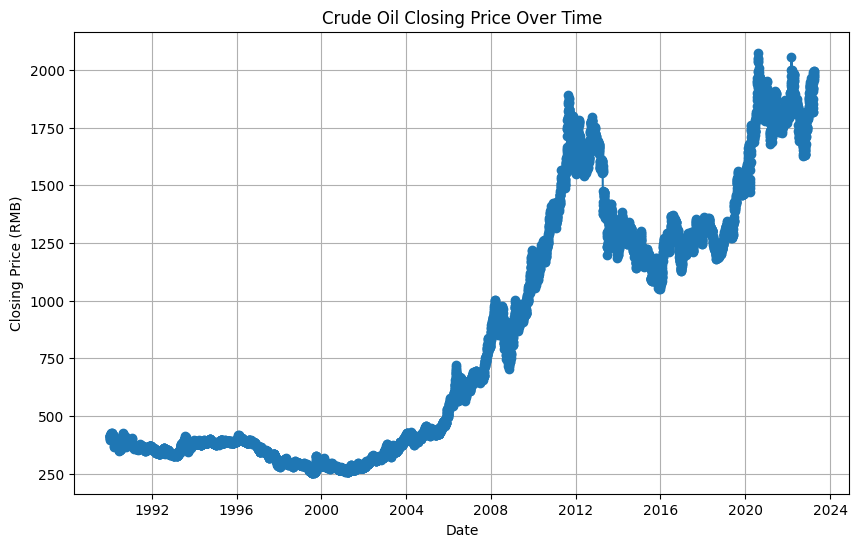

Cross-Validation R-squared Scores: [ 0.98599473 -0.43108425  0.84471217  0.99937795  0.96760414]
Mean R-squared Score: 0.6733209469260968
Standard Deviation of R-squared Scores: 0.554935391018228

Gradient Boosting Results:
Test R-squared: 1.00
Test MSE: 10.69
Test MAE: 2.05


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model
gb_test_score = gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, gb_model.predict(X_test))
gb_mae = mean_absolute_error(y_test, gb_model.predict(X_test))

# Print accuracy metrics
print("\nGradient Boosting Results:")
print(f"Test R-squared: {gb_test_score:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test MAE: {gb_mae:.2f}")


hyper parameter of gold boosting

```
# This is formatted as code
```



Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}

Gradient Boosting Results:
Test R-squared: 1.00
Test MSE: 1.22
Test MAE: 0.66

Cross-Validation R-squared Scores: [ 0.99929475 -0.35584554  0.78213132  0.99989215  0.97137844]
Mean R-squared Score: 0.6793702234866352
Standard Deviation of R-squared Scores: 0.523943952187489


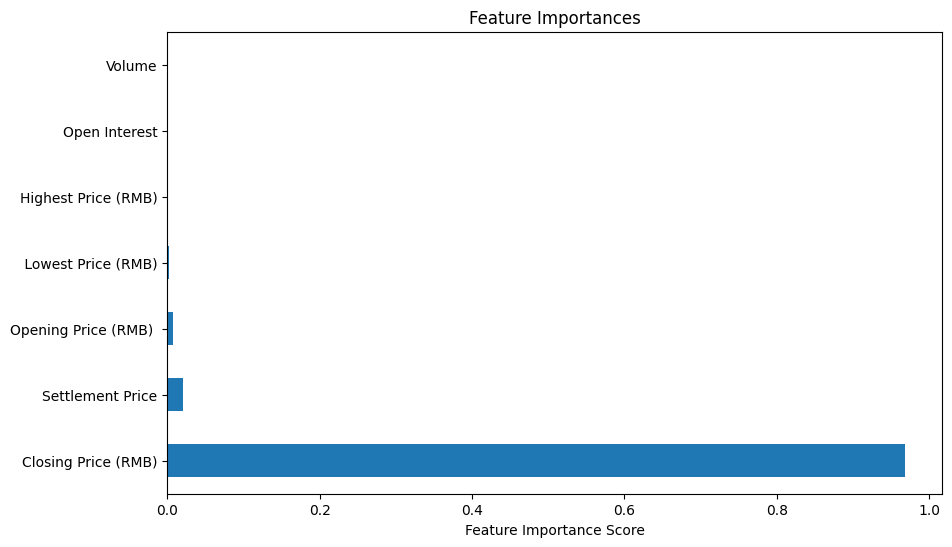

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(gb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model and print accuracy metrics
best_model = random_search.best_estimator_
gb_test_score = best_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, best_model.predict(X_test))
gb_mae = mean_absolute_error(y_test, best_model.predict(X_test))

print("\nGradient Boosting Results:")
print(f"Test R-squared: {gb_test_score:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test MAE: {gb_mae:.2f}")

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("\nCross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())


# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances')
plt.show()


brent new code try

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}

Gradient Boosting Results:
Test R-squared: 1.00
Test MSE: 0.01
Test MAE: 0.05

Cross-Validation R-squared Scores: [0.99791621 0.99968566 0.99440733 0.99997849 0.99995835]
Mean R-squared Score: 0.9983892077917099
Standard Deviation of R-squared Scores: 0.002132974109965578


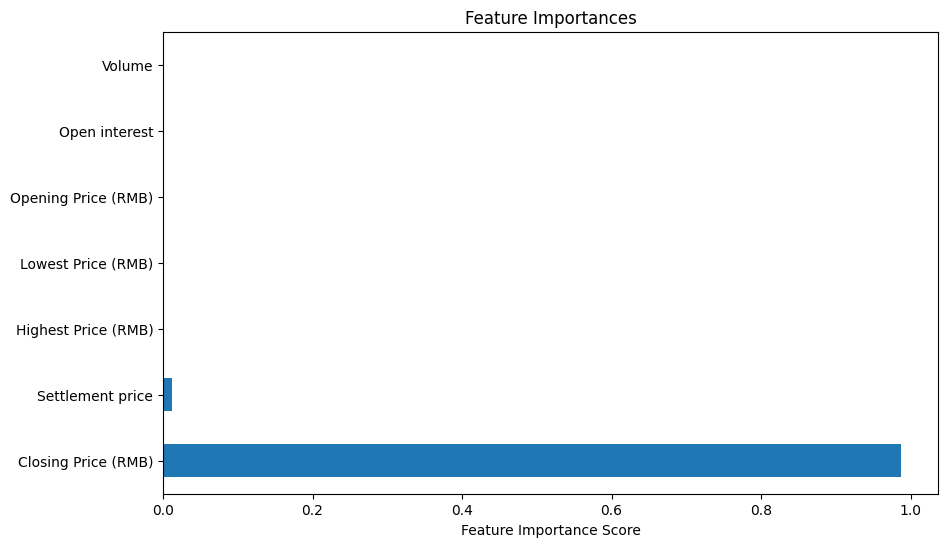

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)','Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(gb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model and print accuracy metrics
best_model = random_search.best_estimator_
gb_test_score = best_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, best_model.predict(X_test))
gb_mae = mean_absolute_error(y_test, best_model.predict(X_test))

print("\nGradient Boosting Results:")
print(f"Test R-squared: {gb_test_score:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test MAE: {gb_mae:.2f}")

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("\nCross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())


# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances')
plt.show()


wti new code try

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}

Gradient Boosting Results:
Test R-squared: 1.00
Test MSE: 0.00
Test MAE: 0.05

Cross-Validation R-squared Scores: [0.99983214 0.99926    0.99485593 0.9999713  0.99969904]
Mean R-squared Score: 0.9987236818666029
Standard Deviation of R-squared Scores: 0.0019485239406921622


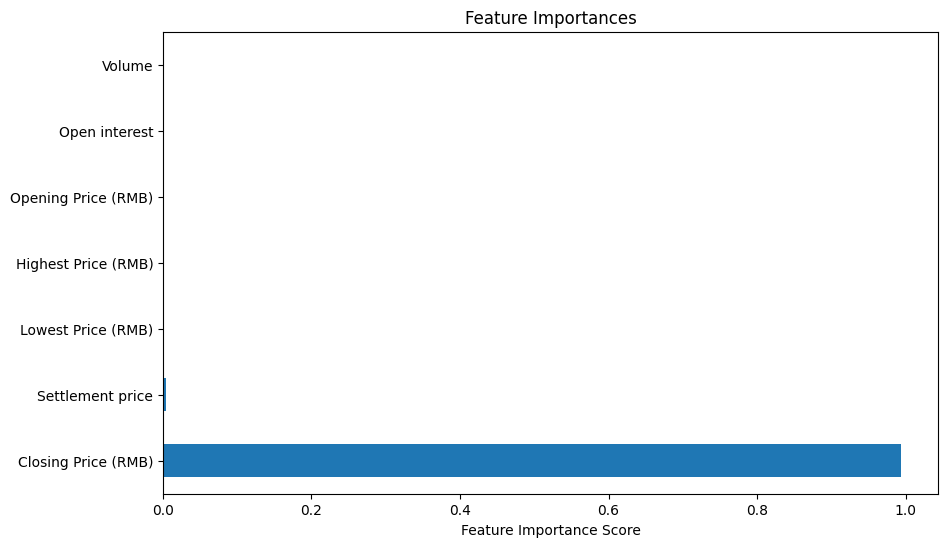

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(gb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model and print accuracy metrics
best_model = random_search.best_estimator_
gb_test_score = best_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, best_model.predict(X_test))
gb_mae = mean_absolute_error(y_test, best_model.predict(X_test))

print("\nGradient Boosting Results:")
print(f"Test R-squared: {gb_test_score:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test MAE: {gb_mae:.2f}")

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("\nCross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())


# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances')
plt.show()


Bagging Brent

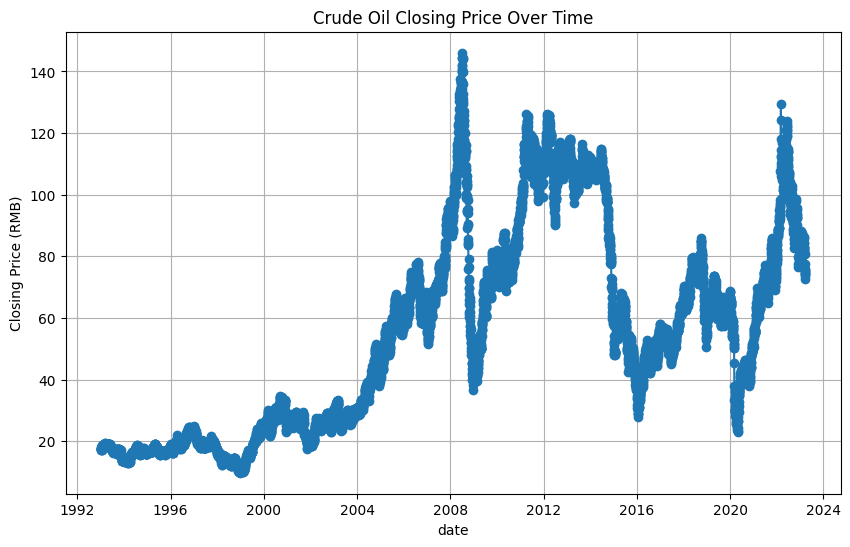

Cross-Validation R-squared Scores: [0.99888931 0.99912063 0.99275847 0.99970788 0.9996263 ]
Mean R-squared Score: 0.9980205188697375
Standard Deviation of R-squared Scores: 0.0026487710694405747

Bagging Model Results:
Test R-squared: 1.00
Test MSE: 0.09
Test MAE: 0.13
Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score,  RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree regressor as the base model
base_model = DecisionTreeRegressor(random_state=42)

# Initialize BaggingRegressor with the decision tree regressor as base estimator
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Evaluate the bagging model
bagging_test_score = bagging_model.score(X_test, y_test)
bagging_mse = mean_squared_error(y_test, bagging_model.predict(X_test))
bagging_mae = mean_absolute_error(y_test, bagging_model.predict(X_test))
print("\nBagging Model Results:")
print(f"Test R-squared: {bagging_test_score:.2f}")
print(f"Test MSE: {bagging_mse:.2f}")
print(f"Test MAE: {bagging_mae:.2f}")
# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_




bagging gold

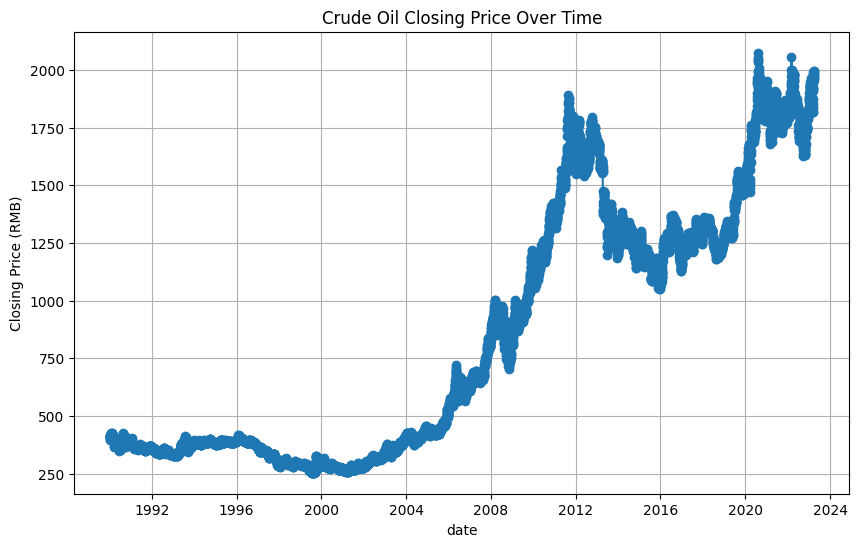

Cross-Validation R-squared Scores: [ 0.99996104 -0.33834465  0.66549648  0.99992379  0.97475944]
Mean R-squared Score: 0.6603592193036667
Standard Deviation of R-squared Scores: 0.5151537258290821

Bagging Model Results:
Test R-squared: 1.00
Test MSE: 0.55
Test MAE: 0.24
Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score,  RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree regressor as the base model
base_model = DecisionTreeRegressor(random_state=42)

# Initialize BaggingRegressor with the decision tree regressor as base estimator
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Evaluate the bagging model
bagging_test_score = bagging_model.score(X_test, y_test)
bagging_mse = mean_squared_error(y_test, bagging_model.predict(X_test))
bagging_mae = mean_absolute_error(y_test, bagging_model.predict(X_test))
print("\nBagging Model Results:")
print(f"Test R-squared: {bagging_test_score:.2f}")
print(f"Test MSE: {bagging_mse:.2f}")
print(f"Test MAE: {bagging_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_





bagging wti

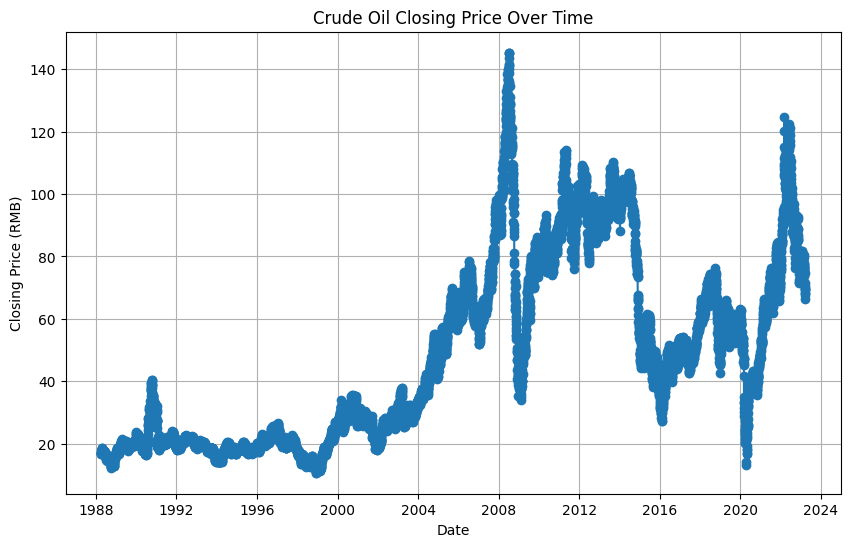

Cross-Validation R-squared Scores: [0.99997056 0.99920648 0.99355545 0.99974798 0.9516962 ]
Mean R-squared Score: 0.9888353340252625
Standard Deviation of R-squared Scores: 0.018720228031940626

Bagging Model Results:
Test R-squared: 1.00
Test MSE: 0.08
Test MAE: 0.11
Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree regressor as the base model
base_model = DecisionTreeRegressor(random_state=42)

# Initialize BaggingRegressor with the decision tree regressor as base estimator
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Evaluate the bagging model
bagging_test_score = bagging_model.score(X_test, y_test)
bagging_mse = mean_squared_error(y_test, bagging_model.predict(X_test))
bagging_mae = mean_absolute_error(y_test, bagging_model.predict(X_test))
print("\nBagging Model Results:")
print(f"Test R-squared: {bagging_test_score:.2f}")
print(f"Test MSE: {bagging_mse:.2f}")
print(f"Test MAE: {bagging_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_





stacking brent

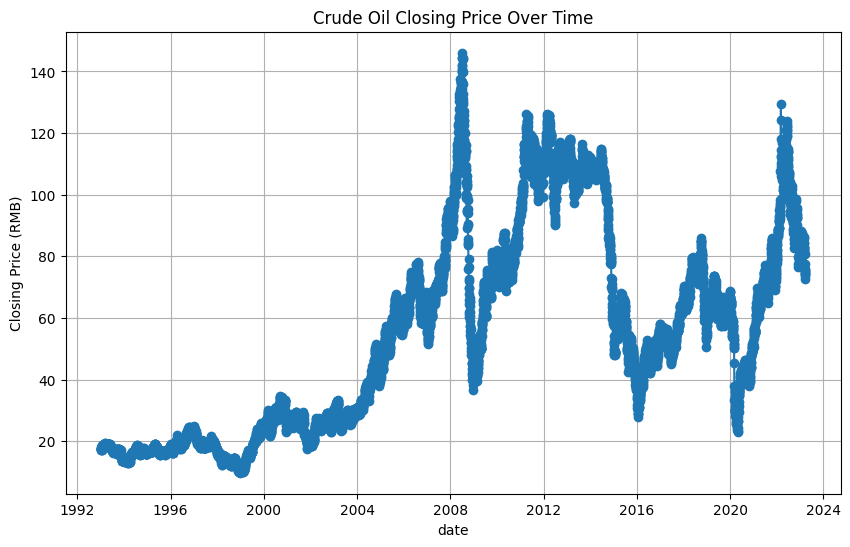

Random Forest CV Scores: [0.99998954 0.9999975  0.99999305 0.99999746 0.99999405]
Random Forest Mean CV Score: 0.999994321935532
Gradient Boosting CV Scores: [0.99995141 0.9999509  0.99995148 0.99993728 0.99994531]
Gradient Boosting Mean CV Score: 0.9999472765386617

Stacked Model Results:
Test R-squared: 1.00
Test MSE: 0.01
Test MAE: 0.02
Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,  RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation on base models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean())
print("Gradient Boosting CV Scores:", gb_cv_scores)
print("Gradient Boosting Mean CV Score:", gb_cv_scores.mean())

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate base model predictions on the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Combine base model predictions into a new feature matrix
X_meta = pd.DataFrame({'RF_Preds': rf_preds, 'GB_Preds': gb_preds})

# Initialize a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()

# Train the meta-model on the base model predictions
meta_model.fit(X_meta, y_test)

# Use the base model predictions as input to the meta-model
stacked_preds = meta_model.predict(X_meta)

# Evaluate the stacked model
stacked_test_score = meta_model.score(X_meta, y_test)
stacked_mse = mean_squared_error(y_test, stacked_preds)
stacked_mae = mean_absolute_error(y_test, stacked_preds)

print("\nStacked Model Results:")
print(f"Test R-squared: {stacked_test_score:.2f}")
print(f"Test MSE: {stacked_mse:.2f}")
print(f"Test MAE: {stacked_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_




stacking gold

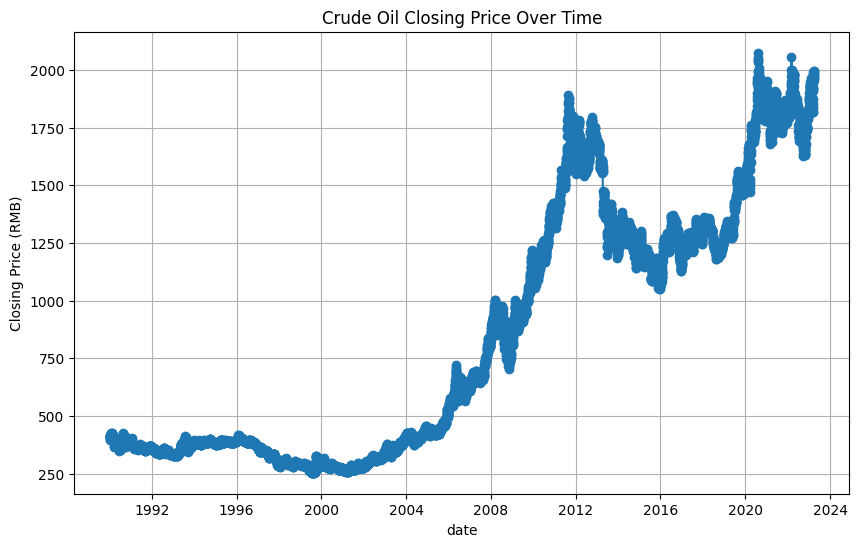

Random Forest CV Scores: [0.9999955  0.99999641 0.99999899 0.99999711 0.99999493]
Random Forest Mean CV Score: 0.9999965875096295
Gradient Boosting CV Scores: [0.99996137 0.99996499 0.99997295 0.99996927 0.99997046]
Gradient Boosting Mean CV Score: 0.999967808616597

Stacked Model Results:
Test R-squared: 1.00
Test MSE: 0.48
Test MAE: 0.24
Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation on base models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean())
print("Gradient Boosting CV Scores:", gb_cv_scores)
print("Gradient Boosting Mean CV Score:", gb_cv_scores.mean())

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate base model predictions on the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Combine base model predictions into a new feature matrix
X_meta = pd.DataFrame({'RF_Preds': rf_preds, 'GB_Preds': gb_preds})

# Initialize a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()

# Train the meta-model on the base model predictions
meta_model.fit(X_meta, y_test)

# Use the base model predictions as input to the meta-model
stacked_preds = meta_model.predict(X_meta)

# Evaluate the stacked model
stacked_test_score = meta_model.score(X_meta, y_test)
stacked_mse = mean_squared_error(y_test, stacked_preds)
stacked_mae = mean_absolute_error(y_test, stacked_preds)

print("\nStacked Model Results:")
print(f"Test R-squared: {stacked_test_score:.2f}")
print(f"Test MSE: {stacked_mse:.2f}")
print(f"Test MAE: {stacked_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_



stacking wti

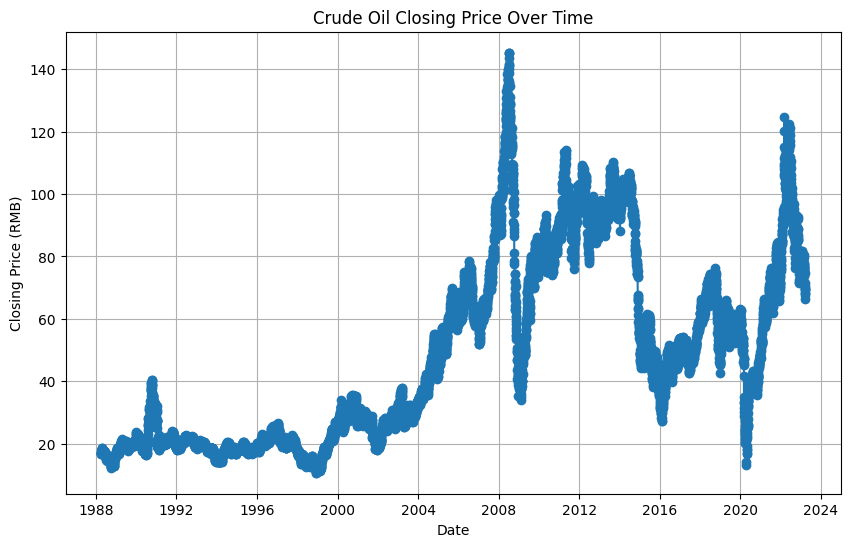

Random Forest CV Scores: [0.99998909 0.99999526 0.99999141 0.99999414 0.99999329]
Random Forest Mean CV Score: 0.9999926380677184
Gradient Boosting CV Scores: [0.99993888 0.99992857 0.9999502  0.99994618 0.99993677]
Gradient Boosting Mean CV Score: 0.9999401225605273

Stacked Model Results:
Test R-squared: 1.00
Test MSE: 0.00
Test MAE: 0.02


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation on base models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean())
print("Gradient Boosting CV Scores:", gb_cv_scores)
print("Gradient Boosting Mean CV Score:", gb_cv_scores.mean())

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate base model predictions on the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Combine base model predictions into a new feature matrix
X_meta = pd.DataFrame({'RF_Preds': rf_preds, 'GB_Preds': gb_preds})

# Initialize a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()

# Train the meta-model on the base model predictions
meta_model.fit(X_meta, y_test)

# Use the base model predictions as input to the meta-model
stacked_preds = meta_model.predict(X_meta)

# Evaluate the stacked model
stacked_test_score = meta_model.score(X_meta, y_test)
stacked_mse = mean_squared_error(y_test, stacked_preds)
stacked_mae = mean_absolute_error(y_test, stacked_preds)

print("\nStacked Model Results:")
print(f"Test R-squared: {stacked_test_score:.2f}")
print(f"Test MSE: {stacked_mse:.2f}")
print(f"Test MAE: {stacked_mae:.2f}")


hyper parameter of wti new code

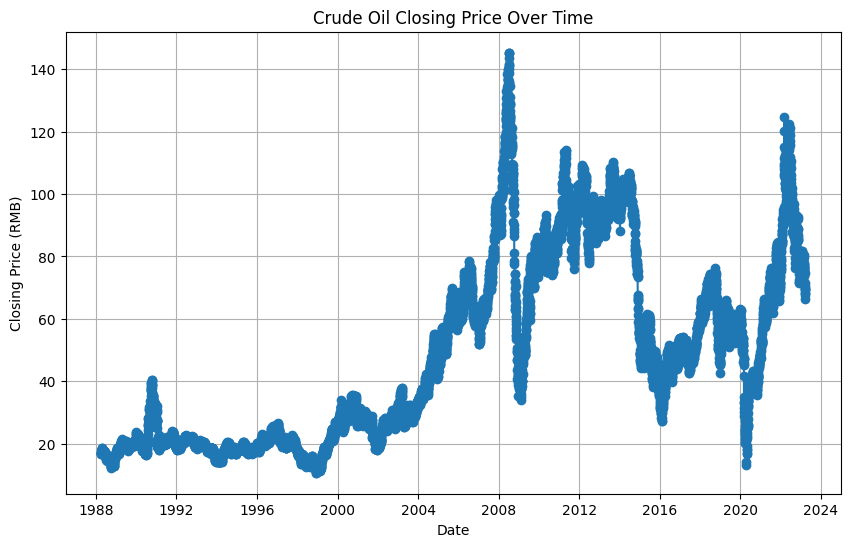

Random Forest CV Scores: [0.99998909 0.99999526 0.99999141 0.99999414 0.99999329]
Random Forest Mean CV Score: 0.9999926380677184
Gradient Boosting CV Scores: [0.99993888 0.99992857 0.9999502  0.99994618 0.99993677]
Gradient Boosting Mean CV Score: 0.9999401225605273

Stacked Model Results:
Test R-squared: 1.00
Test MSE: 0.00
Test MAE: 0.02
Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Plotting the Closing Price (RMB) over time with Date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Closing Price (RMB)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Closing Price (RMB)')
plt.title('Crude Oil Closing Price Over Time')
plt.grid(True)
plt.show()

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation on base models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean())
print("Gradient Boosting CV Scores:", gb_cv_scores)
print("Gradient Boosting Mean CV Score:", gb_cv_scores.mean())

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate base model predictions on the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Combine base model predictions into a new feature matrix
X_meta = pd.DataFrame({'RF_Preds': rf_preds, 'GB_Preds': gb_preds})

# Initialize a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()

# Train the meta-model on the base model predictions
meta_model.fit(X_meta, y_test)

# Use the base model predictions as input to the meta-model
stacked_preds = meta_model.predict(X_meta)

# Evaluate the stacked model
stacked_test_score = meta_model.score(X_meta, y_test)
stacked_mse = mean_squared_error(y_test, stacked_preds)
stacked_mae = mean_absolute_error(y_test, stacked_preds)

print("\nStacked Model Results:")
print(f"Test R-squared: {stacked_test_score:.2f}")
print(f"Test MSE: {stacked_mse:.2f}")
print(f"Test MAE: {stacked_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_


heat map brent

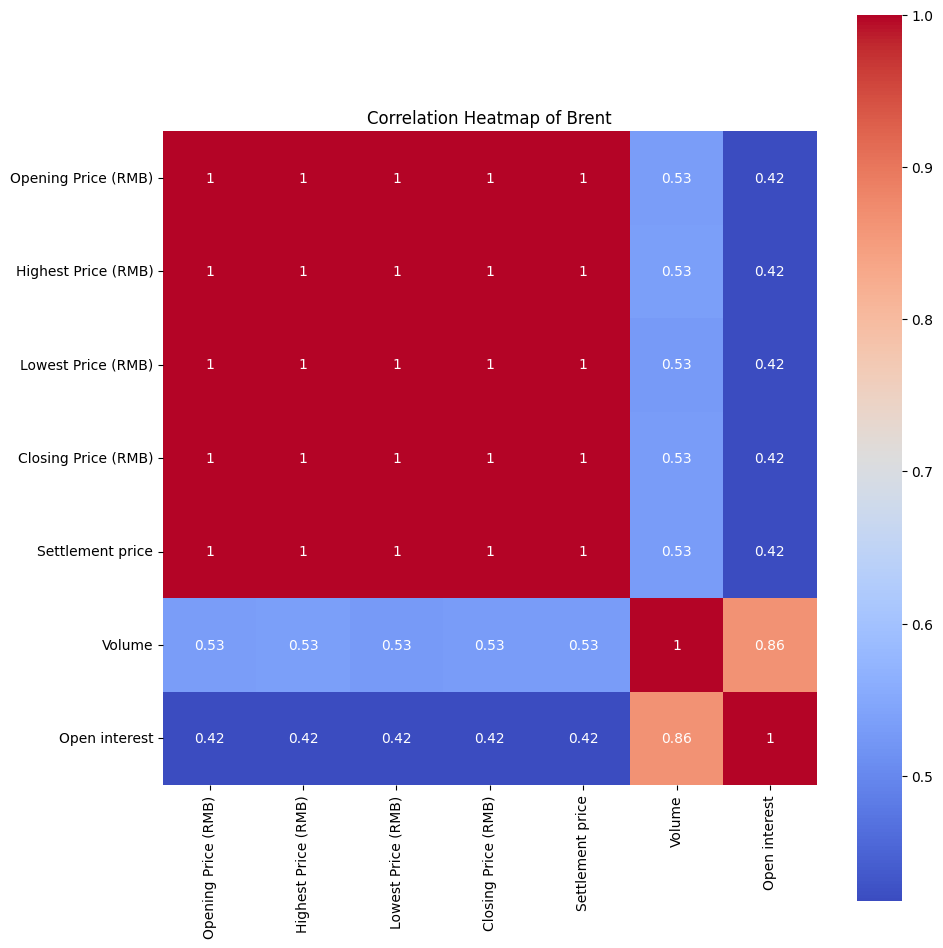

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C__Users_deept_Desktop_Brent1_imputed.xlsx')

# Specify the features
features = ['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)',
            'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']

# Select the relevant columns from the dataset
df = data[features]

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title and adjust layout
plt.title('Correlation Heatmap of Brent')
plt.tight_layout()

# Display the heatmap
plt.show()

haet map gold

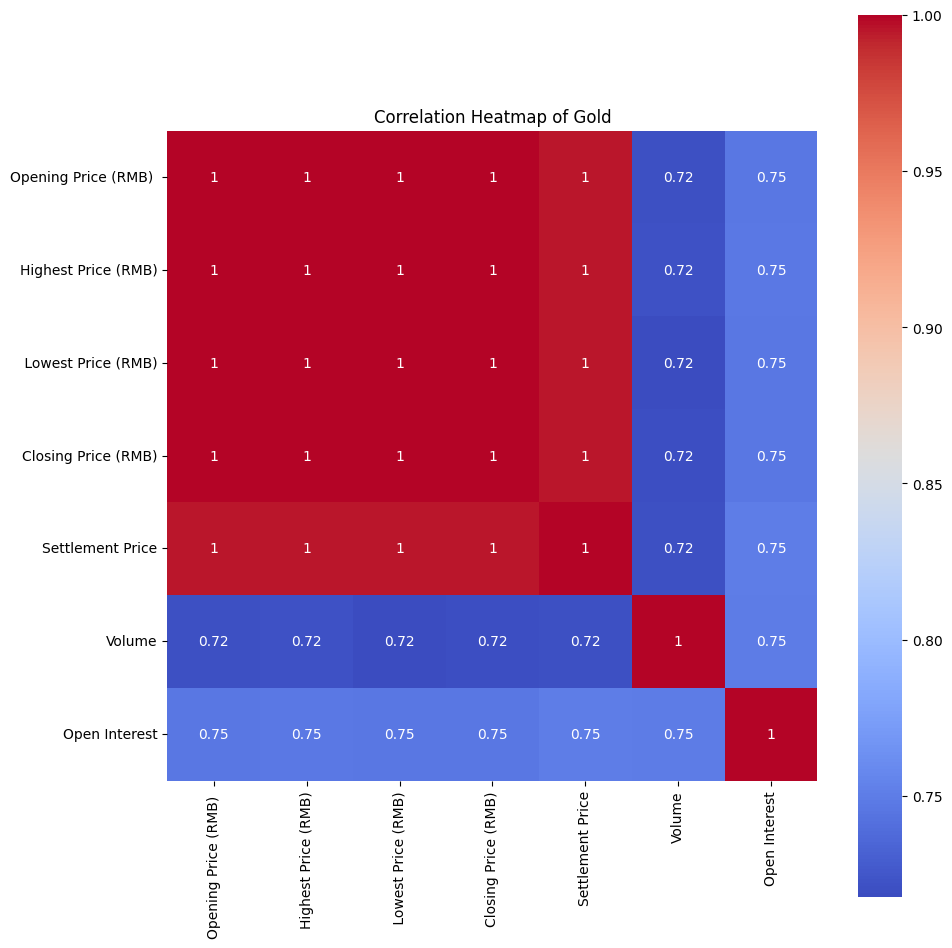

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Specify the features
features = ['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']

# Select the relevant columns from the dataset
df = data[features]

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title and adjust layout
plt.title('Correlation Heatmap of Gold')
plt.tight_layout()

# Display the heatmap
plt.show()

heat map wti

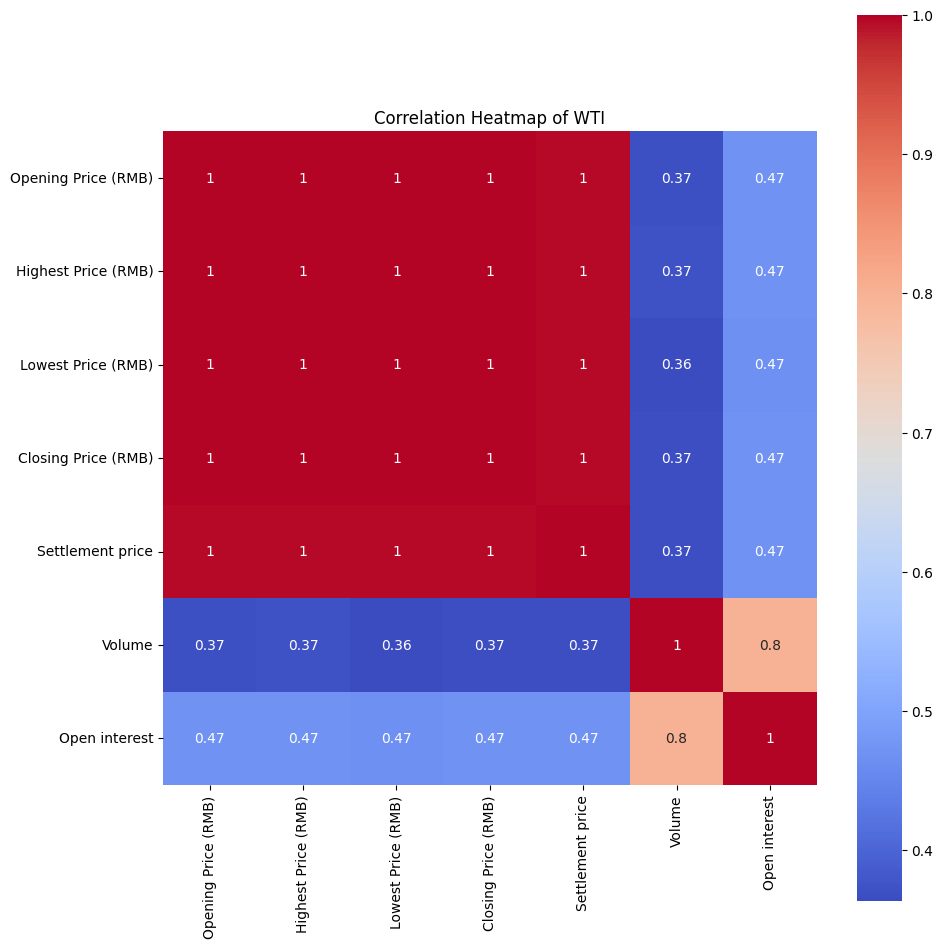

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C__Users_deept_Desktop_WTI_imputed.xlsx')

# Specify the features
features = ['Opening Price (RMB)', 'Highest Price (RMB)', 'Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement price', 'Volume', 'Open interest']

# Select the relevant columns from the dataset
df = data[features]

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title and adjust layout
plt.title('Correlation Heatmap of WTI')
plt.tight_layout()

# Display the heatmap
plt.show()

Best Hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}

Gradient Boosting Results:
Test R-squared: 1.00
Test MSE: 1.22
Test MAE: 0.66

Cross-Validation R-squared Scores: [ 0.99929475 -0.35584554  0.78213132  0.99989215  0.97137844]
Mean R-squared Score: 0.6793702234866352
Standard Deviation of R-squared Scores: 0.523943952187489


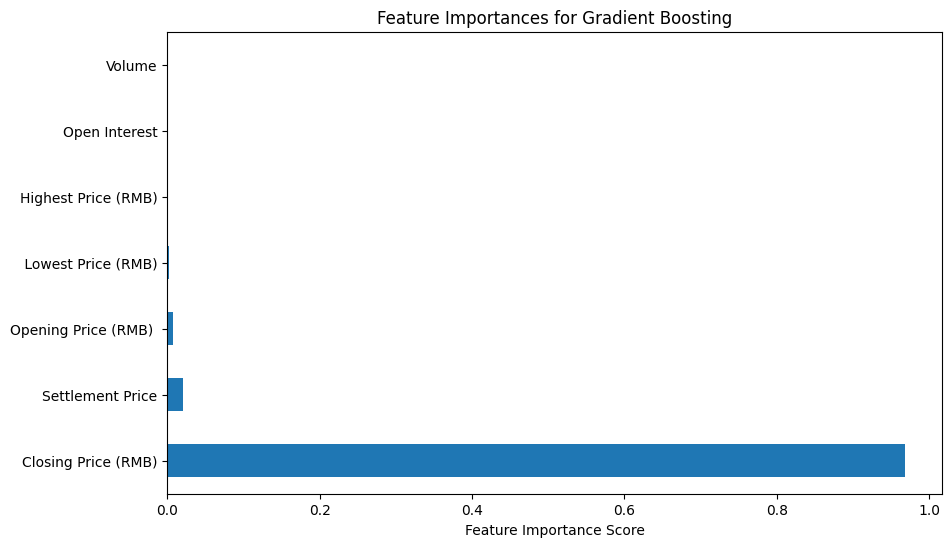


Cross-Validation R-squared Scores for Bagging Regressor: [ 0.99996104 -0.33834465  0.66549648  0.99992379  0.97475944]
Mean R-squared Score: 0.6603592193036667
Standard Deviation of R-squared Scores: 0.5151537258290821

Bagging Model Results:
Test R-squared: 1.00
Test MSE: 0.55
Test MAE: 0.24

Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Gradient Boosting Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the Brent crude oil price data from Excel
df = pd.read_excel('C__Users_deept_Desktop_Gold1_imputed.xlsx')

# Specify features (X) and target variable (y)
X = df[['Opening Price (RMB) ', 'Highest Price (RMB)', ' Lowest Price (RMB)', 'Closing Price (RMB)', 'Settlement Price', 'Volume', 'Open Interest']]
y = df['Closing Price (RMB)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 1: Gradient Boosting Regressor with Hyperparameter Tuning
gb_model = GradientBoostingRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(gb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters for Gradient Boosting:", random_search.best_params_)

best_gb_model = random_search.best_estimator_
gb_test_score = best_gb_model.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, best_gb_model.predict(X_test))
gb_mae = mean_absolute_error(y_test, best_gb_model.predict(X_test))

print("\nGradient Boosting Results:")
print(f"Test R-squared: {gb_test_score:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test MAE: {gb_mae:.2f}")

cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='r2')
print("\nCross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Plot feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_gb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances for Gradient Boosting')
plt.show()

# Part 2: Bagging Regressor and Hyperparameter Tuning for Random Forest and Gradient Boosting
# Initialize decision tree regressor as the base model
base_model = DecisionTreeRegressor(random_state=42)

# Initialize BaggingRegressor with the decision tree regressor as base estimator
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Perform cross-validation for Bagging Regressor
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='r2')
print("\nCross-Validation R-squared Scores for Bagging Regressor:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Evaluate the bagging model
bagging_test_score = bagging_model.score(X_test, y_test)
bagging_mse = mean_squared_error(y_test, bagging_model.predict(X_test))
bagging_mae = mean_absolute_error(y_test, bagging_model.predict(X_test))

print("\nBagging Model Results:")
print(f"Test R-squared: {bagging_test_score:.2f}")
print(f"Test MSE: {bagging_mse:.2f}")
print(f"Test MAE: {bagging_mae:.2f}")

# Define the parameter distributions for hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize base models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Perform hyperparameter tuning with RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
rf_random_search.fit(X_train, y_train)
print("\nBest Random Forest Hyperparameters:", rf_random_search.best_params_)

gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)

# Use the best models from the hyperparameter tuning
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_